In [6]:
#import libraries 
import pandas as pd
import numpy as np
from PIL import Image
import torch
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
#extract data
data = pd.read_csv("animal-clef-2025/metadata.csv")
data.head()

,image_id,identity,path,date,orientation,species,split,dataset
0,0,LynxID2025_lynx_37,images/LynxID2025/database/000f9ee1aad063a4485...,NaN,right,lynx,database,LynxID2025
1,1,LynxID2025_lynx_37,images/LynxID2025/database/0020edb6689e9f78462...,NaN,left,lynx,database,LynxID2025
2,2,LynxID2025_lynx_49,images/LynxID2025/database/003152e4145b5b69400...,NaN,left,lynx,database,LynxID2025
3,3,NaN,images/LynxID2025/query/003b89301c7b9f6d18f722...,NaN,back,lynx,query,LynxID2025
4,4,LynxID2025_lynx_13,images/LynxID2025/database/003c3f82011e9c3f849...,NaN,right,lynx,database,LynxID2025


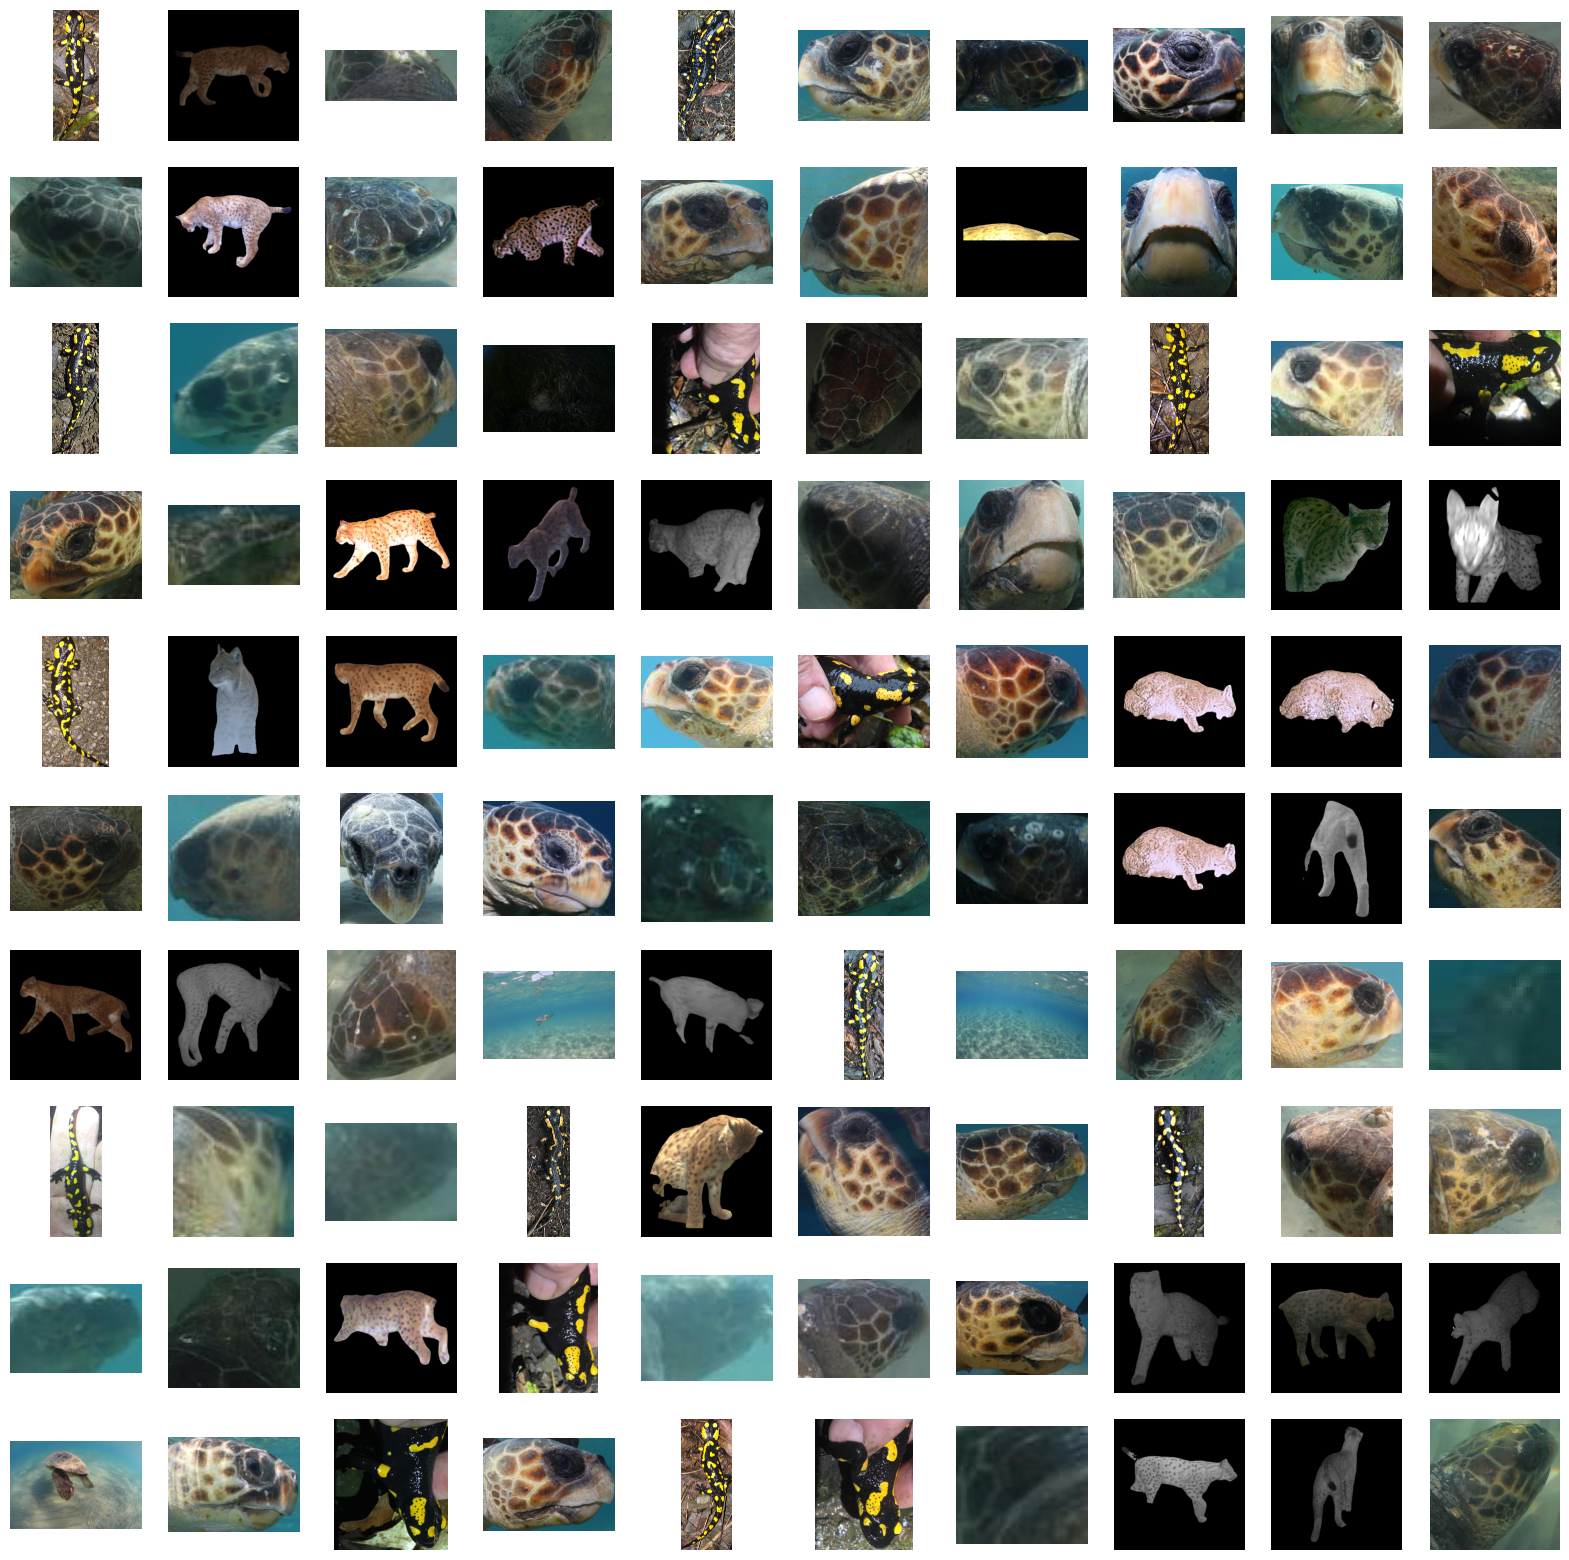

In [3]:
path = "animal-clef-2025/" + data['path'].sample(100,random_state = 21).values
fig, ax = plt.subplots(10, 10, figsize=(20, 20))
for i in range(10):
    for k,j in enumerate(range(10)):
        img = Image.open(path[i*10+j])
        ax[i, j].imshow(img)
        ax[i, j].axis('off')
plt.show()

In [10]:
train_ds = tf.keras.utils.image_dataset_from_directory("animal-clef-2025/train/",image_size=(100,100),batch_size=128)
val_ds = tf.keras.utils.image_dataset_from_directory("animal-clef-2025/Test/",image_size=(100,100),batch_size=128)

Found 13074 files belonging to 3 classes.
Found 2135 files belonging to 3 classes.


In [9]:
class_names = train_ds.class_names
print(class_names)

['LynxID2025', 'SalamanderID2025', 'SeaTurtleID2022']


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds_unshuffled = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
train_ds = train_ds.shuffle(1000).cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)